In [14]:
# coding:utf-8
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model

%matplotlib inline
sns.set_style({'font.sans-serif':['simhei','Arial']})
sns.set_style('white')

* 生成数据集

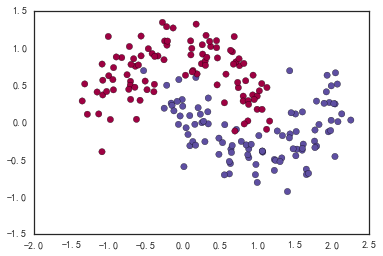

In [9]:
np.random.seed(0)
X, y = datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

* 分类器效果绘制

In [26]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

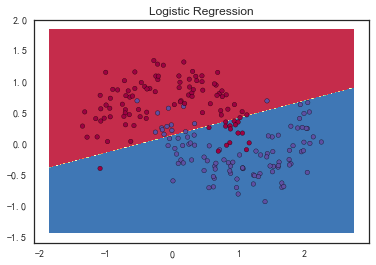

In [27]:
# logistic regression展示示例
clf = linear_model.LogisticRegressionCV()
clf.fit(X, y)
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

## NeuralNetwork实现
参考链接https://github.com/dennybritz/nn-from-scratch/blob/master/nn-from-scratch.ipynb

In [96]:
class NeuralNetwork(object):
    def __init__(self, 
                 nn_input_dim = 2, # 输入层节点
                 nn_output_dim = 2, # 输出层节点
                 nn_hide_dim = 3, # 隐藏层节点
                 lr = 0.01, # learning rate
                 reg_lambda = 0.01, # regularization strength
        ):
        self.nn_input_dim = nn_input_dim
        self.nn_output_dim = nn_output_dim
        self.nn_hide_dim = nn_hide_dim
        self.lr = lr
        self.reg_lambda = reg_lambda
        
        np.random.seed(0)
        self.W1 = np.random.randn(self.nn_input_dim, self.nn_hide_dim)
        self.b1 = np.zeros((1, self.nn_hide_dim))
        self.W2 = np.random.randn(self.nn_hide_dim, self.nn_output_dim)
        self.b2 = np.zeros((1, self.nn_output_dim))
    
    def _calc_proba(self, X):
        z1 = X.dot(self.W1) + self.b1
        # tanh
        a1 = np.tanh(z1)
        z2 = a1.dot(self.W2) + self.b2
        # softmax
        exp_scores = np.exp(z2)
        proba = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        
        self.z1 = z1
        self.a1 = a1
        self.z2 = z2
        return proba
    
    def fit(self, X, y, epoch=2000, vorbose=True):
        self.X = np.array(X)
        self.y = np.array(y)
        
        if self.X.shape[1] != self.nn_input_dim:
            raise Exception('X的维度与输入层节点数不同')
        if np.unique(self.y).shape[0] != self.nn_output_dim:
            raise Exception('y的维度与输出层节点数不同')
        if self.X.shape[0] != y.shape[0]:
            raise Exception('X与y的样本量不同')
            
        for i in range(epoch):
            # Forward propagation
            proba = self._calc_proba(self.X)
            
            # Back propagation (TODO zhanjiefan: 直接使用参考链接的代码，因为参考链接的公式与代码没法对上，后续优化)
            delta3 = proba
            delta3[range(self.y.shape[0]), y] -= 1
            dW2 = (self.a1.T).dot(delta3)
            db2 = np.sum(delta3, axis=0, keepdims=True)
            delta2 = delta3.dot(self.W2.T) * (1 - np.power(self.a1, 2))
            dW1 = np.dot(self.X.T, delta2)
            db1 = np.sum(delta2, axis=0)
            
            # 正则项
            dW1 += self.reg_lambda * self.W1
            dW2 += self.reg_lambda * self.W2
            
            # 梯度下降
            self.W1 -= self.lr * dW1
            self.b1 -= self.lr * db1
            self.W2 -= self.lr * dW2
            self.b2 -= self.lr * db2
        
    def predict(self, X_pred):
        proba = self._calc_proba(X_pred)
        return np.argmax(proba, axis=1)
    

[0 1 1 0 1]
[0 1 0 0 1]


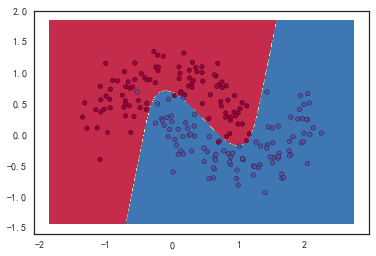

In [97]:
nn = NeuralNetwork()
nn.fit(X, y, epoch=2000)
plot_decision_boundary(lambda x: nn.predict(x))

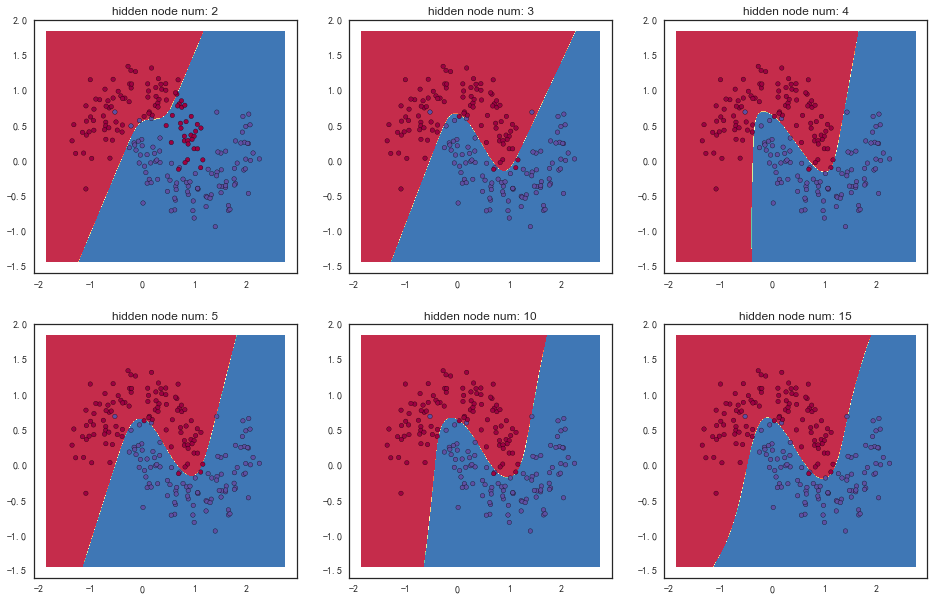

In [102]:
plt.figure(figsize=(15,10))
hide_node_list = [2,3,4,5,10,15]
for i, hide_node in enumerate(hide_node_list):
    plt.subplot(2,3,i+1)
    plt.title('hidden node num: %d'%hide_node)
    nn = NeuralNetwork(nn_input_dim=2, nn_hide_dim=hide_node, nn_output_dim=2)
    nn.fit(X, y, epoch=200)
    plot_decision_boundary(lambda x: nn.predict(x))